<img src="../imgs/ime-usp-logo.png" width="100px" align="right" display="block">

# Usando scikit-learn

Aqui mostramos como usar alguns classificadores disponíveis no scikit-learn

### 1. Gerar os dados

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from funcoes import geraDados2DfronteiraNonLinear

%matplotlib inline

N = 100
#X, y, x, fx = geraDados2DfronteiraNonLinear(N)

# draw N random points in the [0,1]x[0,1] square
    
x1 = np.random.rand(N)
x2 = np.random.rand(N)
X = np.vstack(zip(np.ones(N),x1, x2))
print("Shape do X: ", X.shape)

# use cosine to define positive and negative classes
y = np.array([1 if np.cos(2*np.pi*X[i,1]) / 2 + 0.5 > X[i,2] else 0 for i in range(N)])
print("Shape do y: ", y.shape)

Shape do X:  (100, 3)
Shape do y:  (100,)


/home/vitormeriat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


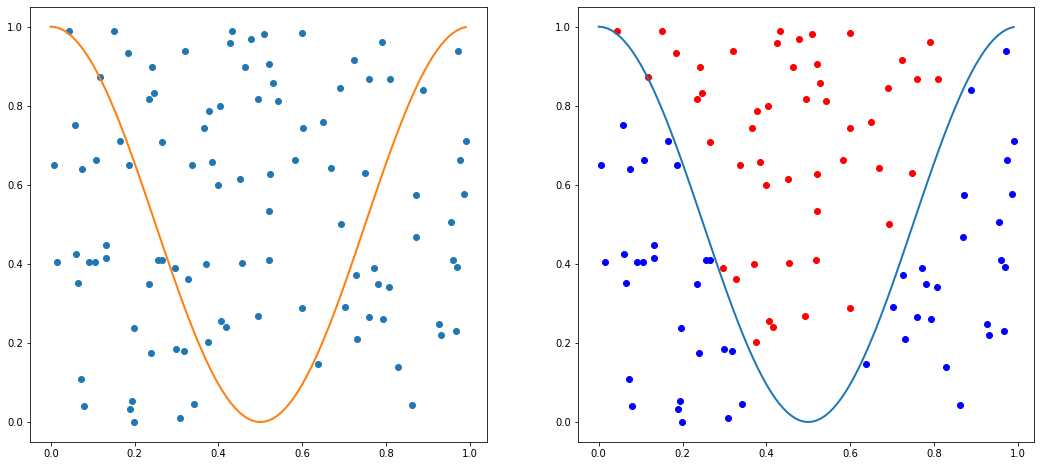

In [23]:
p = plt.figure(figsize=(18,8))
p1 = p.add_subplot(121)
p1.plot(x1,x2,'o')

# create a cosine curve and add to the plot
x = np.arange(0, 1.0, 0.01)
fx = np.cos(2*np.pi*x) / 2 + 0.5
p1.plot(x, fx, lw=2)

# discriminate those above and below the curve
p2 = p.add_subplot(122)
for i in range(N):
    if y[i]==1:
        p2.plot(x1[i],x2[i],'bo')  # o (bolinhas) azuis (blue)
    else:
        p2.plot(x1[i],x2[i],'ro')  # o (bolinhas) vermelhas (red)

p2.plot(x, fx, lw=2)
plt.show()

### 2. Usar regressão logística do scikit-learn

http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=100)  # default max_iter=100
clf.fit(X,y)

z = clf.predict(X)

print(z)

[1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0]


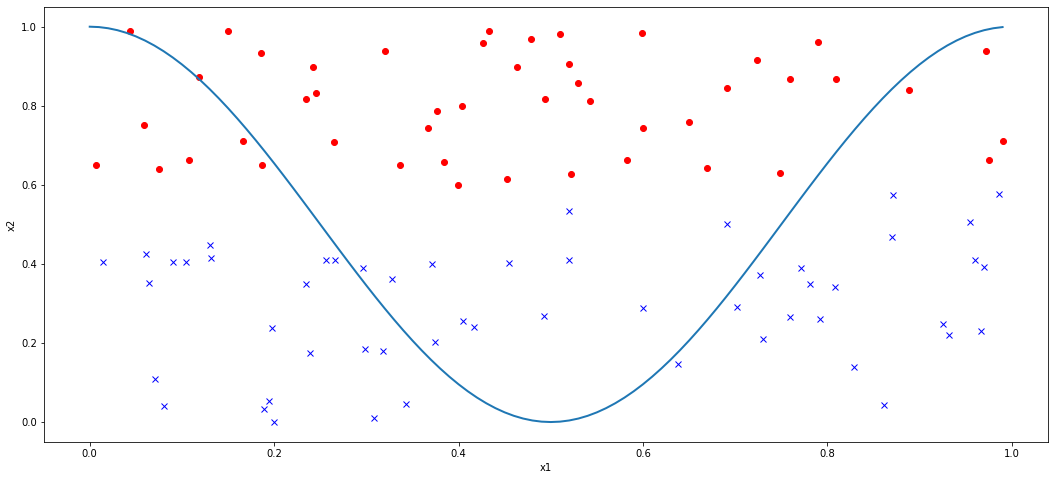

In [25]:
plt.figure(figsize=(18,8))

for i in range(N):
    if z[i] > 0.5:
        plt.plot(X[i,1], X[i,2], 'bx')
    else:
        plt.plot(X[i,1], X[i,2], 'ro')

plt.plot(x, fx, lw=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### 3. Usar SVM do scikit-learn

http://scikit-learn.org/stable/modules/svm.html

In [26]:
from sklearn import svm

clf = svm.SVC(gamma=0.3, C=100.)
clf.fit(X,y)

z = clf.predict(X)

print(z)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1
 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0]


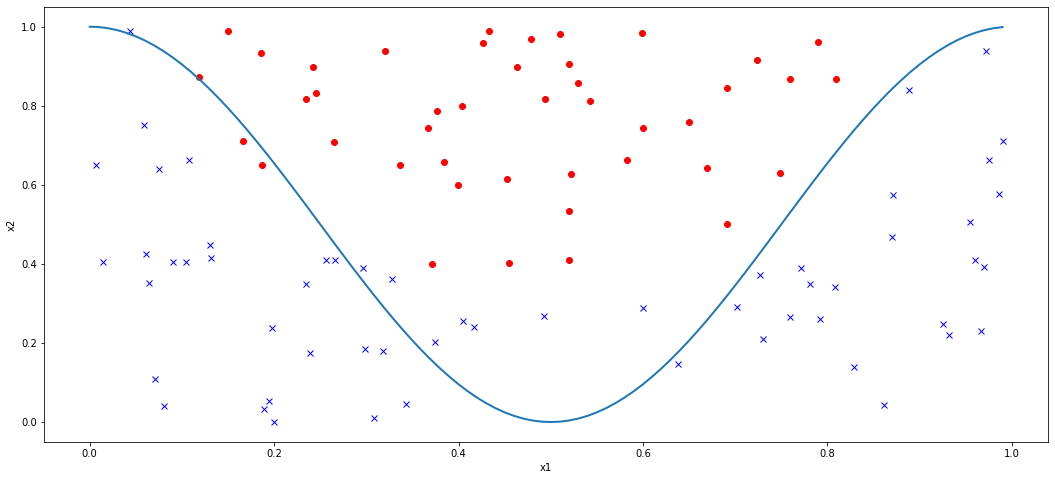

In [27]:
plt.figure(figsize=(18,8))

for i in range(N):
    if z[i] > 0.5:
        plt.plot(X[i,1], X[i,2], 'bx')
    else:
        plt.plot(X[i,1], X[i,2], 'ro')
        
plt.plot(x, fx, lw=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### 4. Redes neurais multicamadas

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier


In [28]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', learning_rate_init=0.01, max_iter=500, hidden_layer_sizes=(10), random_state=1)

clf.fit(X, y)

z = clf.predict(X)
print(z)

[1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0]


/home/vitormeriat/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


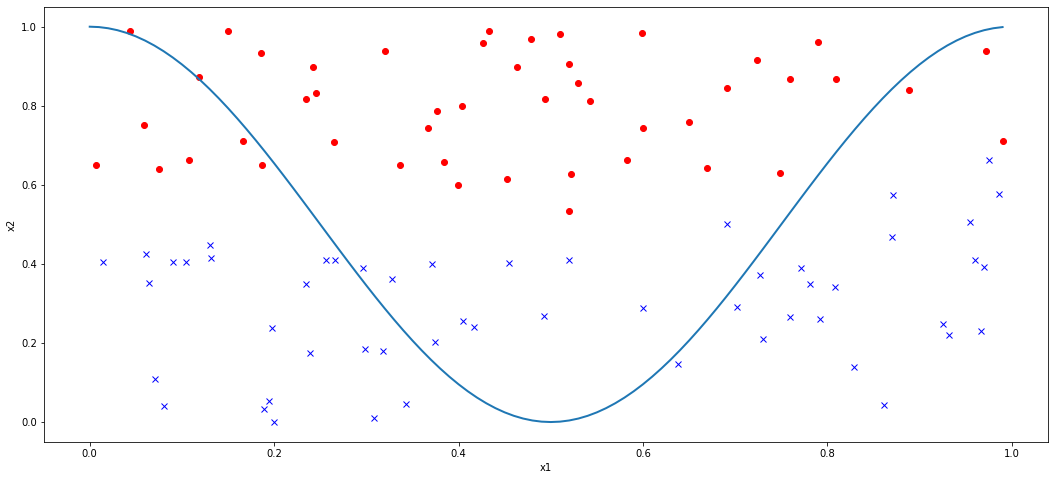

In [29]:
plt.figure(figsize=(18,8))

for i in range(N):
    if z[i] > 0.5:
        plt.plot(X[i,1], X[i,2], 'bx')
    else:
        plt.plot(X[i,1], X[i,2], 'ro')
        
plt.plot(x, fx, lw=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()